<a href="https://colab.research.google.com/github/Chayon58/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

# Path to your cancer images
cancer_path = '/content/drive/MyDrive/Research/data/images'
cancer_images = [f for f in os.listdir(cancer_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

print(f"Found {len(cancer_images)} cancer images")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1000 cancer images


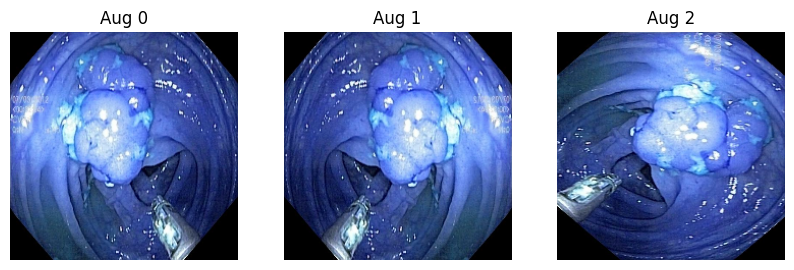

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

IMG_SIZE = 224

def preprocess_image(img_path):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # normalize
    return image

def augment_image(image):
    flip = cv2.flip(image, 1)  # horizontal flip
    rotate = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    return [image, flip, rotate]

# Visualize some augmentations
sample = os.path.join(cancer_path, random.choice(cancer_images))
img = preprocess_image(sample)
augmented = augment_image(img)

plt.figure(figsize=(10,3))
for i, a in enumerate(augmented):
    plt.subplot(1,3,i+1)
    plt.imshow(a)
    plt.title(f"Aug {i}")
    plt.axis('off')
plt.show()


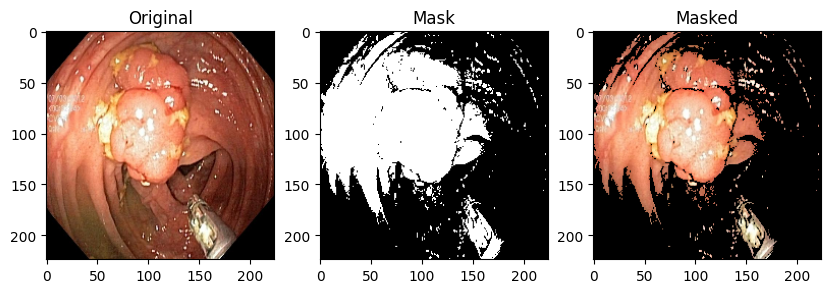

In [ ]:
def mask_cancer_region(img_path):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Simple threshold to highlight regions
    _, mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply mask to image
    masked = cv2.bitwise_and(image, image, mask=mask)

    # Show
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.title("Original")
    plt.subplot(1,3,2); plt.imshow(mask, cmap='gray'); plt.title("Mask")
    plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)); plt.title("Masked")
    plt.show()

# Try on sample
mask_cancer_region(sample)


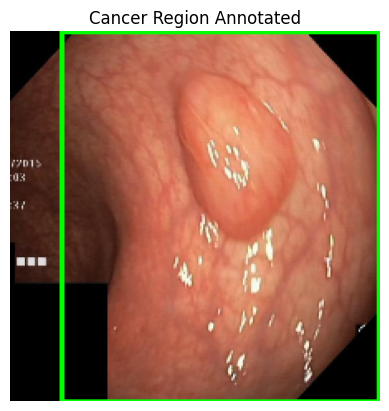

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import random # Import random

IMG_SIZE = 224

# Modify mask_cancer_region to return the mask
def mask_cancer_region_return_mask(img_path):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Simple threshold to highlight regions
    _, mask = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return mask

def annotate_cancer_region(img_path, mask): # Pass the mask directly
    image = cv2.imread(img_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

    # mask is already resized and in the correct format, no need to read or resize
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w * h > 500:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Cancer Region Annotated")
    plt.axis('off')
    plt.show()

# Select a random image from the available cancer images
sample_img_name = random.choice(cancer_images)
sample_img_path = os.path.join(cancer_path, sample_img_name)


# Generate the mask using the modified function
sample_mask = mask_cancer_region_return_mask(sample_img_path)

# Now call the function with the actual image path and the generated mask
annotate_cancer_region(sample_img_path, sample_mask)

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Original dataset path with only cancer images
cancer_path = '/content/drive/MyDrive/Research/data/images'
images = [f for f in os.listdir(cancer_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Split into two equal parts (fake cancer and normal)
class1, class2 = train_test_split(images, test_size=0.5, random_state=42)

# Create folder structure for train/test split
for folder in ['train/cancer', 'train/normal', 'test/cancer', 'test/normal']:
    os.makedirs(f'/content/fake_data/{folder}', exist_ok=True)

# Copy images into these folders
def copy_images(files, class_name, split):
    for f in files:
        src = os.path.join(cancer_path, f)
        dst = f'/content/fake_data/{split}/{class_name}/{f}'
        shutil.copy(src, dst)

# Split each fake class into 80% train, 20% test
train1, test1 = train_test_split(class1, test_size=0.2, random_state=42)
train2, test2 = train_test_split(class2, test_size=0.2, random_state=42)

copy_images(train1, 'cancer', 'train')
copy_images(test1, 'cancer', 'test')
copy_images(train2, 'normal', 'train')
copy_images(test2, 'normal', 'test')


Found 952 images belonging to 2 classes.
Found 352 images belonging to 2 classes.
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4954 - loss: 0.8986 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.4928 - loss: 0.6933 - val_accuracy: 0.5597 - val_loss: 0.6931
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.5170 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.5055 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.4962 - loss: 0.6931 - val_accuracy: 0.5398 - val_loss: 0.6930
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.4978 - loss: 0.6950 - val_accuracy: 0.5028 - val_loss: 0.6930
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.4917 - loss: 0.6922 - val_accuracy: 0.5057 - val_loss: 0.6930
Epoch 8/10
60/60 ━━━━━━━━━━━━

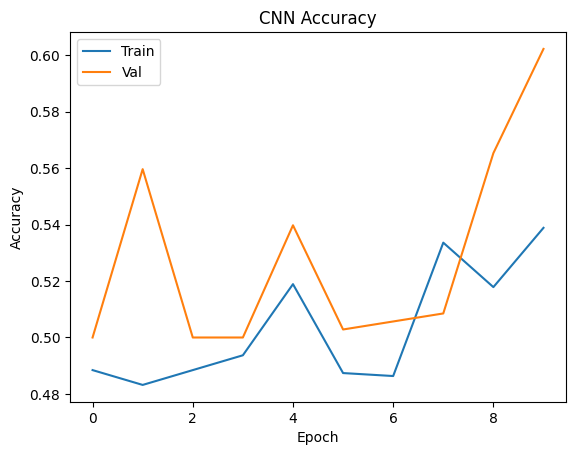

✅ CNN Accuracy on Test Set: 60.23%


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

IMG_SIZE = 224
BATCH_SIZE = 16

# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/fake_data/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    '/content/fake_data/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Build CNN model
def build_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

# Train the model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Final accuracy on test set
loss, acc = model.evaluate(test_gen, verbose=0)
print(f"✅ CNN Accuracy on Test Set: {acc * 100:.2f}%")
